# I Overview

## Dataset attribute information

There are 23 variables

1. **ID** = ID of each client.
2. **LIMIT_BAL** = Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
3. **SEX** = Gender (1 = male; 2 = female). 
4. **EDUCATION** = Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
5. **MARRIAGE** = Marital status (1 = married; 2 = single; 3 = others). 
6. **AGE** = Age (year). 

(for the below 6 attributes
-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
7. **PAY_0** = The repayment status in September, 2005.
8. **PAY_2** = The repayment status in August, 2005.
9. **PAY_3** = The repayment status in July, 2005.
10. **PAY_4** = The repayment status in June, 2005.
11. **PAY_5** = The repayment status in May, 2005.
12. **PAY_6** = The repayment status in April, 2005. 

(for the below 6 attributes in NT dollar)
13. **BILL_AMT1** = Amount of bill statement in September, 2005.
14. **BILL_AMT2** = Amount of bill statement in August, 2005.
15. **BILL_AMT3** = Amount of bill statement in July, 2005.
16. **BILL_AMT4** = Amount of bill statement in June, 2005.
17. **BILL_AMT5** = Amount of bill statement in May, 2005.
18. **BILL_AMT6** = Amount of bill statement in April, 2005. 

(for the below 6 attributes in NT dollar)
19. **PAY_AMT1** = Amount paid in September, 2005.
20. **PAY_AMT2** = Amount paid in August, 2005.
21. **PAY_AMT3** = Amount paid in July, 2005.
22. **PAY_AMT4** = Amount paid in June, 2005.
23. **PAY_AMT5** = Amount paid in May, 2005.
24. **PAY_AMT6** = Amount paid in April, 2005. 
25. **default.payment.next.month** = Default payment (1=yes, 0=no)

In [1]:
#Importing Dependencies
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
from imblearn.over_sampling import SMOTE 
from sklearn.cross_validation import cross_val_score
from tqdm import tqdm_notebook as tqdm


D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#importing the dataset
dataset =pd.read_excel('default of credit card clients.xls',header=1,index_col=0)
X = dataset.iloc[:,0:23].values
y = dataset.iloc[:,23].values

In [3]:
dataset['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [4]:
#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state=0)

In [5]:
sm = SMOTE(random_state=0,ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
#Fititng Logistic Regression to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
classifier.score(X_train, y_train)

0.6339111111111111

In [9]:
y_train.mean()

0.2224

In [10]:
# predict class labels for the test set
predicted = classifier.predict(X_test)


In [11]:
# generate class probabilities
probs = classifier.predict_proba(X_test)


In [12]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.6286666666666667
0.7043218265066763


In [13]:
#confusion matrix and a classification report with other metrics.
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[3679 2189]
 [ 596 1036]]
             precision    recall  f1-score   support

          0       0.86      0.63      0.73      5868
          1       0.32      0.63      0.43      1632

avg / total       0.74      0.63      0.66      7500



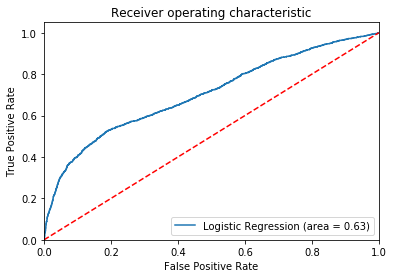

In [14]:
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [15]:
print( '\nTest Results')
print ( classifier.score(X_test, y_test))
print (recall_score(y_test, classifier.predict(X_test)))


Test Results
0.6286666666666667
0.6348039215686274


# Precitions using entire data set
### predict class labels for the entire set
predicted_X = classifier.predict(X)
### generate class probabilities
probs_X = classifier.predict_proba(X)
### generate evaluation metrics
print(metrics.accuracy_score(y, predicted_X))
print(metrics.roc_auc_score(y, probs_X[:, 1]))
### confusion matrix and a classification report with other metrics.
print(metrics.confusion_matrix(y, predicted_X))
print(metrics.classification_report(y, predicted_X))

# TENSORFLOW LOGREG

In [50]:
# Setting parameters
num_features = X_train.shape[1]
learning_rate = 0.05
training_epochs = 200

In [42]:
tf.reset_default_graph()

# By aving 2 features: hours slept & hours studied
X = tf.placeholder(tf.float32, [None, num_features], name="X")
Y = tf.placeholder(tf.float32, [None, 1], name="Y")

# Initialize our weigts & bias
W = tf.get_variable("W", [num_features, 1], initializer = tf.contrib.layers.xavier_initializer())
b = tf.get_variable("b", [1], initializer = tf.zeros_initializer())

Z = tf.add(tf.matmul(X, W), b)
predictiontf = tf.nn.sigmoid(Z)

# Calculate the cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Z, labels = Y))

# Use Adam as optimization method
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)



In [56]:
loss = np.empty(shape=[1],dtype=float)
training_acc =[]
test_acc = []

In [44]:
y_train_res = y_train_res.reshape(34992,1)

In [45]:
y_train = y_train.reshape(22500,1)

In [46]:
y_test = y_test.reshape(7500,1)

In [57]:
init = tf.global_variables_initializer()
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)


with tf.Session() as sess:
    sess.run(init)
    # Calculate the correct predictions
    correct_prediction = tf.to_float(tf.greater(predictiontf, 0.5))
    #print(type(sess.run(correct_prediction)))    
    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.to_float(tf.equal(Y, correct_prediction)))
    
    for epoch in range(training_epochs):
        print("Epoch:", '%04d' % (epoch+1))
        _, c = sess.run([optimizer, cost], feed_dict={X: X_train_res, Y: y_train_res})
        
        temp_train_acc = sess.run(accuracy, feed_dict={X: X_train, Y: y_train})
        temp_test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
        
        #cost.append(c)
        loss = np.append(loss, c)
        training_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)
        
    
    
    #training_acc = 
    #print(tf.confusion_matrix(Y,correct_prediction))
    #sess.run(accuracy,feed_dict={data:X_train,})    
    print ("Train Accuracy:", accuracy.eval({X: X_train, Y: y_train}))
    print ("Test Accuracy:", accuracy.eval({X: X_test, Y: y_test}))

Epoch: 0001
Epoch: 0002
Epoch: 0003
Epoch: 0004
Epoch: 0005
Epoch: 0006
Epoch: 0007
Epoch: 0008
Epoch: 0009
Epoch: 0010
Epoch: 0011
Epoch: 0012
Epoch: 0013
Epoch: 0014
Epoch: 0015
Epoch: 0016
Epoch: 0017
Epoch: 0018
Epoch: 0019
Epoch: 0020
Epoch: 0021
Epoch: 0022
Epoch: 0023
Epoch: 0024
Epoch: 0025
Epoch: 0026
Epoch: 0027
Epoch: 0028
Epoch: 0029
Epoch: 0030
Epoch: 0031
Epoch: 0032
Epoch: 0033
Epoch: 0034
Epoch: 0035
Epoch: 0036
Epoch: 0037
Epoch: 0038
Epoch: 0039
Epoch: 0040
Epoch: 0041
Epoch: 0042
Epoch: 0043
Epoch: 0044
Epoch: 0045
Epoch: 0046
Epoch: 0047
Epoch: 0048
Epoch: 0049
Epoch: 0050
Epoch: 0051
Epoch: 0052
Epoch: 0053
Epoch: 0054
Epoch: 0055
Epoch: 0056
Epoch: 0057
Epoch: 0058
Epoch: 0059
Epoch: 0060
Epoch: 0061
Epoch: 0062
Epoch: 0063
Epoch: 0064
Epoch: 0065
Epoch: 0066
Epoch: 0067
Epoch: 0068
Epoch: 0069
Epoch: 0070
Epoch: 0071
Epoch: 0072
Epoch: 0073
Epoch: 0074
Epoch: 0075
Epoch: 0076
Epoch: 0077
Epoch: 0078
Epoch: 0079
Epoch: 0080
Epoch: 0081
Epoch: 0082
Epoch: 0083
Epoc

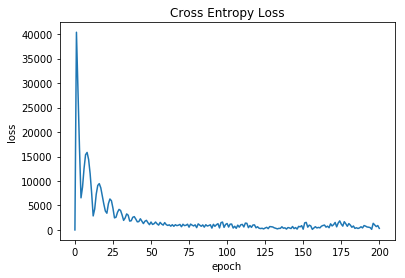

In [59]:
plt.plot(loss)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

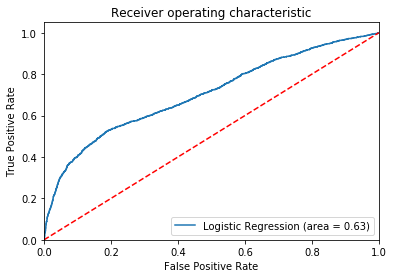

In [25]:
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()